# Gated Recurrent Units (GRU)

## Concise Implementation

In high-level APIs, we can directly instantiate a GRU model. This encapsulates all the configuration detail that we made explicit above.

In [1]:
using Downloads,IterTools,CUDA,Flux
using StatsBase: wsample

device = Flux.get_device(; verbose=true)

file_path = Downloads.download("http://d2l-data.s3-accelerate.amazonaws.com/timemachine.txt")
raw_text = open(io->read(io, String),file_path)
str = lowercase(replace(raw_text,r"[^A-Za-z]+"=>" "))
tokens = [str...]
vocab = unique(tokens)
vocab_len = length(vocab)

# n*[seq_length x feature x batch_size]
function getdata(str::String,vocab::Vector{Char},seq_length::Int,batch_size::Int)::Tuple
    data = collect.(partition(str,seq_length,1))
    x = [[Flux.onehotbatch(i,vocab) for i in d] for d in Flux.batchseq.(Flux.chunk(data[begin:end-1];size = batch_size))]
    y = [[Flux.onehotbatch(i,vocab) for i in d] for d in Flux.batchseq.(Flux.chunk(data[2:end];size = batch_size))]
    return x,y
end

function loss(model, xs, ys)
    Flux.reset!(model)
    return sum(Flux.logitcrossentropy.([model(x) for x in xs], ys))
end

function predict(model::Chain, prefix::String, num_preds::Int)
    model = cpu(model)
    Flux.reset!(model)
    buf = IOBuffer()
    write(buf, prefix)

    c = wsample(vocab, softmax([model(Flux.onehot(c, vocab)) for c in collect(prefix)][end]))
    for i in 1:num_preds
        write(buf, c)
        c = wsample(vocab, softmax(model(Flux.onehot(c, vocab))))
    end
    return String(take!(buf))
end

┌ Info: Using backend: CUDA.
└ @ Flux /home/nero/.julia/packages/Flux/Wz6D4/src/functor.jl:662


predict (generic function with 1 method)

In [2]:
model = Chain(GRUv3(vocab_len => 32),Dense(32 => vocab_len)) |> device
opt_state = Flux.setup(Adam(1e-2), model)

x,y = getdata(str, vocab, 32, 1024) |> device
data = zip(x,y)
loss_train = []

for epoch in 1:50
    Flux.reset!(model)
    Flux.train!(loss,model,data,opt_state)
    push!(loss_train,sum(loss.(Ref(model), x, y)) / length(str)) 
end

"$(epoch) start" = "1 start"
"$(epoch) start" = "2 start"
"$(epoch) start" = "3 start"
"$(epoch) start" = "4 start"
"$(epoch) start" = "5 start"
"$(epoch) start" = "6 start"
"$(epoch) start" = "7 start"
"$(epoch) start" = "8 start"
"$(epoch) start" = "9 start"
"$(epoch) start" = "10 start"
"$(epoch) start" = "11 start"
"$(epoch) start" = "12 start"
"$(epoch) start" = "13 start"
"$(epoch) start" = "14 start"
"$(epoch) start" = "15 start"
"$(epoch) start" = "16 start"
"$(epoch) start" = "17 start"
"$(epoch) start" = "18 start"
"$(epoch) start" = "19 start"
"$(epoch) start" = "20 start"
"$(epoch) start" = "21 start"
"$(epoch) start" = "22 start"
"$(epoch) start" = "23 start"
"$(epoch) start" = "24 start"
"$(epoch) start" = "25 start"
"$(epoch) start" = "26 start"
"$(epoch) start" = "27 start"
"$(epoch) start" = "28 start"
"$(epoch) start" = "29 start"
"$(epoch) start" = "30 start"
"$(epoch) start" = "31 start"
"$(epoch) start" = "32 start"
"$(epoch) start" = "33 start"
"$(epoch) start" = 

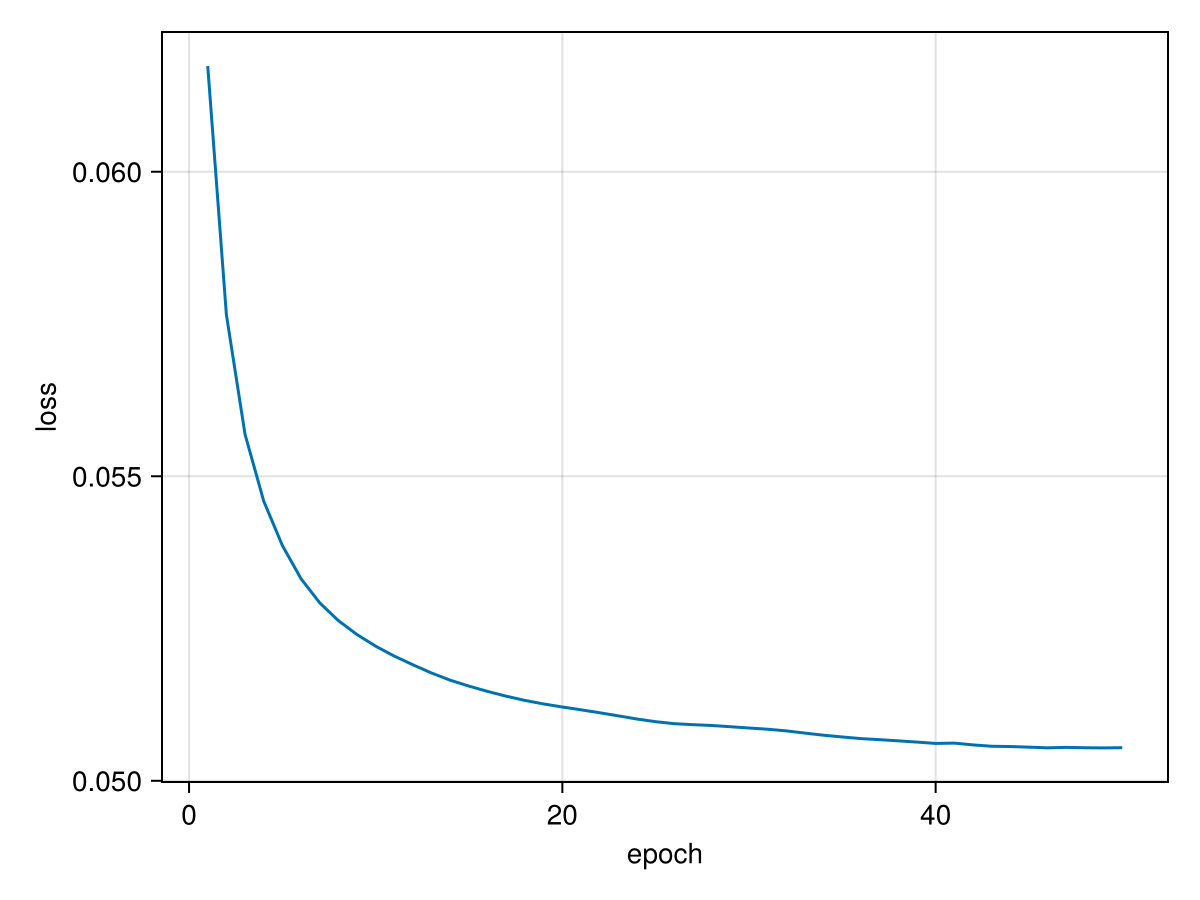

In [3]:
using CairoMakie
fg,ax = lines(loss_train; axis=(;xlabel = "epoch",ylabel = "loss"))

In [4]:
predict(model,"it has ",20)

"it has same peear rore they"